<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Practice: Neural Networks with One Hidden Layer: Noisy XOR</h1>


<h2>Objective</h2><ul><li> How to create a neural network model with multiple neurons.</li></ul> 


<h2>Preparation</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

Use the following function to plot the data: 


In [2]:
# Plot the data

def plot_decision_regions_2class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1],
             'o', label = 'y = 0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 
             'ro', label = 'y = 1')
    plt.title('Decision Region')
    plt.legend()
    plt.show()

In [3]:
# Function to calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == 
                   (model(data_set.x)[:, 0] > 0.5).numpy())

<h2 id="Model">Neural Network Module and Training Function</h2> 


In [8]:
# Define the class Net with one hidden layer

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # Hidden layer
        self.linear1 = nn.Linear(D_in, H)
        # Output layer
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [9]:
# Define function to train model

def train(data_set, model, criterion,
          train_loader, optimizer, epochs = 5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Cumulative loss
            total += loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color = color)
    ax1.set_xlabel('Epoch', color = color)
    ax1.set_ylabel('Total Loss', color = color)
    ax1.tick_params(axis = 'y', color = color)
    
    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color = color) # already handled x-label with ax1
    ax2.plot(ACC, color = color)
    ax2.tick_params(axis = 'y', color = color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

<h2 id="Makeup_Data">Make Some Data</h2> 


In [10]:
# Define the class XOR_Data

class XOR_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(),
                 self.x[self.y[:, 0] == 0, 1].numpy(),
                 'o', label = "y = 0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(),
                 self.x[self.y[:, 0] == 1, 1].numpy(),
                 'ro', label = "y = 1")
        plt.legend()
        plt.show()

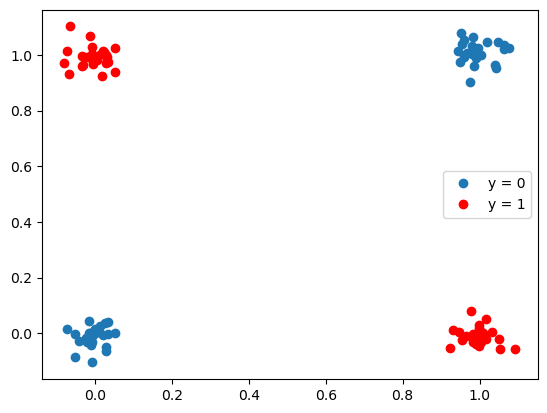

In [11]:
# Create dataset object

data_set = XOR_Data()
data_set.plot_stuff()

<h2 id="One">One Neuron</h2> 


<h3>Try</h3>


Create a neural network <code>model</code> with one neuron. Then, use the following code to train it:


In [13]:
model1 = Net(2, 1 ,1)

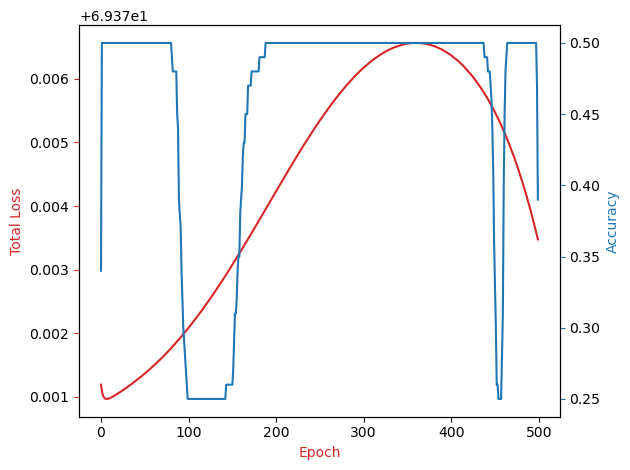

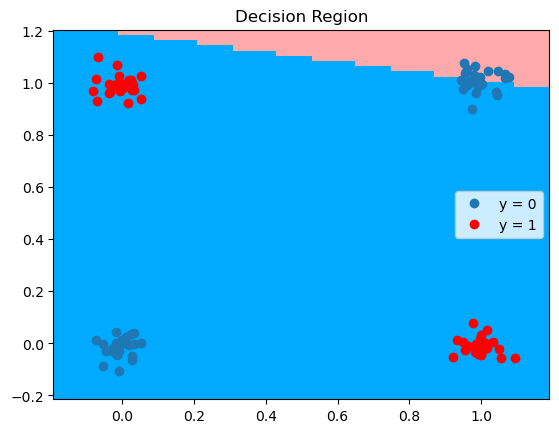

In [17]:
# Train the model

learning_rate = 0.01

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model1.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set, batch_size = 1)

LOSS12 = train(data_set, model1, criterion, 
               train_loader, optimizer, epochs = 500)

plot_decision_regions_2class(model1, data_set)

<h2 id="Two">Two Neurons</h2> 


<h3>Try</h3>


In [16]:
# Practice: create a model w/ 2 neurons

model2 = Net(2, 2 ,1)

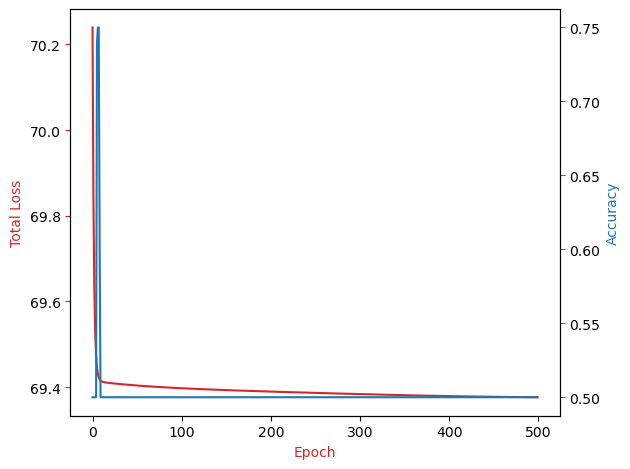

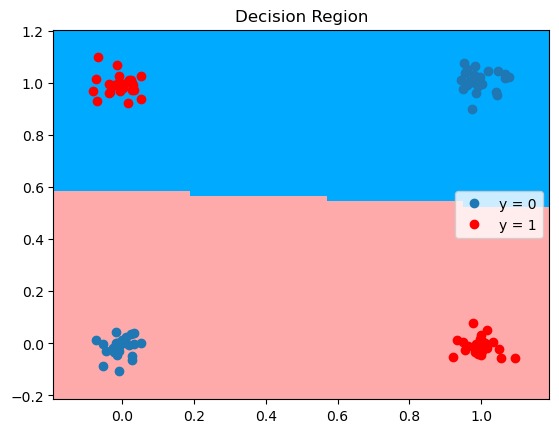

In [18]:
# Train 2nd model

learning_rate = 0.01

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model2.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set, batch_size = 1)

LOSS12 = train(data_set, model2, criterion,
               train_loader, optimizer, epochs = 500)

plot_decision_regions_2class(model2, data_set)

<h2 id="Three">Three Neurons</h2> 


<h3>Try</h3>


In [20]:
# Practice: create model w/ 3 neurons

model3 = Net(2, 3 ,1)

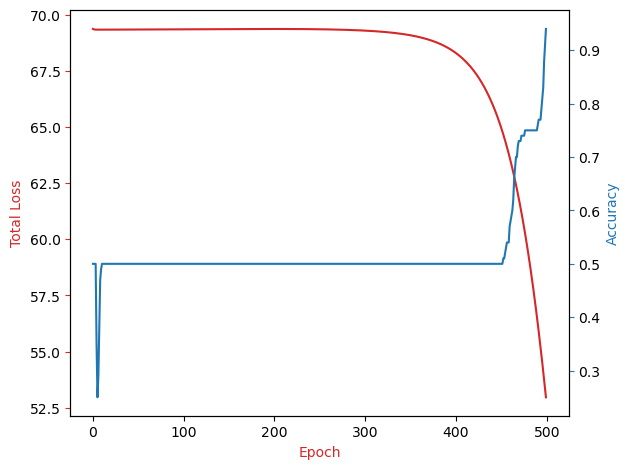

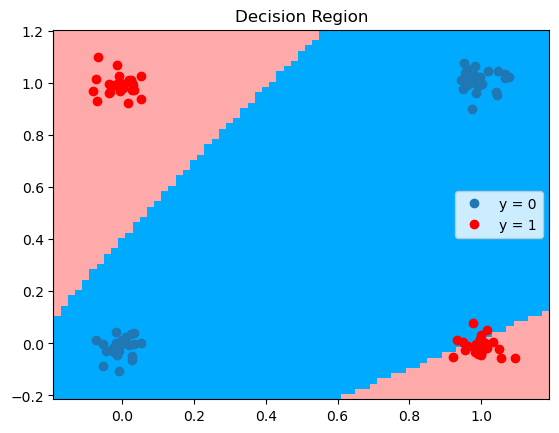

In [21]:
# Train the model

learning_rate = 0.01

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model3.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set, batch_size = 1)

LOSS12 = train(data_set, model3, criterion,
               train_loader, optimizer, epochs = 500)

plot_decision_regions_2class(model3, data_set)

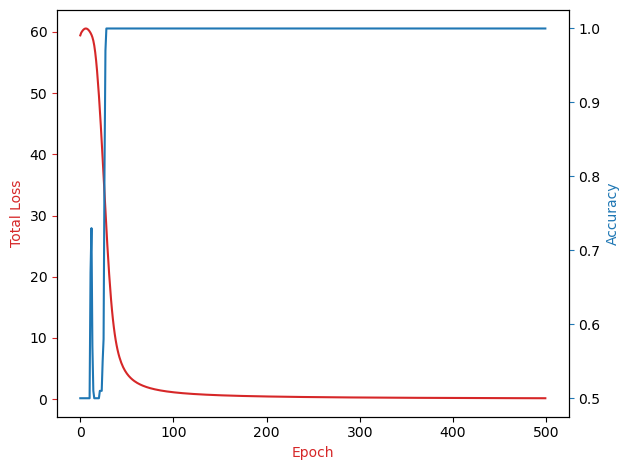

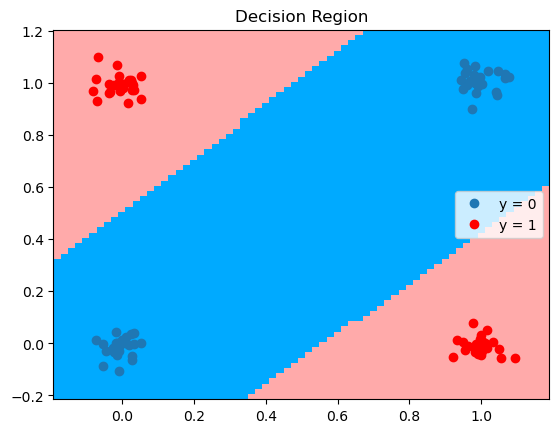

In [25]:
model5 = Net(2, 4, 1)

learning_rate = 0.1

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model5.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set, batch_size = 1)

LOSS12 = train(data_set, model5, criterion,
               train_loader, optimizer, epochs = 500)

plot_decision_regions_2class(model5, data_set)